# Comparing RNN and LSTM for Predicting Apple Stock Price

Connor Rippert  
21-618-392  
Professor Mario Silic  
University of St. Gallen   
**Skills: Programming - Introduction Level**  
Fall Semester 2024


*Project Description:*

The following project compares two deep learning architectures—Recurrent Neural Networks (RNNs) and Long Short-Term Memory networks (LSTMs)—for predicting stock prices. Both models are well-suited for sequential data, making them an ideal choice for financial time series forecasting.

In this case, historical stock price data for Apple Inc. (AAPL) is used to train both models. The dataset is divided into training and testing sets, and the closing price is normalized for better model performance. Using a 60-day lookback period, the models are trained to predict the next day's closing price.

The project involves:

 - Fetching historical stock price data from Yahoo Finance.
 - Preprocessing the data to create time-series input-output pairs.
 - Building and training both RNN and LSTM models.
 - Comparing their performance by visualizing training loss and evaluating predictions on unseen test data.
 - Calculating and visualizing evaluation metrics, specifically Mean Squared Error (MSE), for both models.
 - Finally, a bar chart illustrates the comparison of MSE for training and testing data, providing insights into the relative strengths and weaknesses of RNNs and LSTMs for this financial forecasting task.

# Step 1: Import Libraries

In order to properly run this code you must import the necessary libraries,which includes importing numpy, pandas, matplotlib, sklearn, keras, and yfinance.

numpy: Handles numerical computations and array manipulation for creating time-series datasets.

pandas: Loads, processes, and structures the stock price data efficiently.

matplotlib.pyplot: Visualizes data, predictions, and evaluation metrics with various plots.

sklearn.preprocessing.MinMaxScaler: Normalizes data to improve model performance and convergence.

keras.Sequential: Builds the sequential structure of both the RNN and LSTM models.

keras.layers.SimpleRNN: Defines the recurrent layers for the RNN model.

keras.layers.LSTM: Implements the Long Short-Term Memory layers for capturing long-term dependencies.

keras.layers.Dense: Creates the final layer for predicting the next day's stock price.

yfinance: Fetches historical stock price data directly from Yahoo Finance.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense
import yfinance as yf

# Step 2: Fetch Data

Fetching data is essential to provide the historical stock prices needed to train and evaluate the predictive models.

In [25]:
# Define the stock symbol as 'AAPL' (Apple's stock ticker) and date range for historical data retrieval from 2015 to 2023
stock_symbol = 'AAPL'
start_date = '2015-01-01'
end_date = '2023-01-01'

In [26]:
# Download historical stock data from Yahoo Finance
data = yf.download(stock_symbol, start=start_date, end=end_date)
# Keep only the closing prices for simplicity
data = data[['Close']]
data.reset_index(inplace=True)  # Reset the index to use dates as a column
data = data.dropna()  # Remove any rows with missing data

[*********************100%***********************]  1 of 1 completed


# Step 3: Preprocess Data

Preprocessing data is necessary to prepare it for effective training by ensuring the data is clean, scaled, and structured for the model to understand patterns.

In [29]:
# Normalize the data to the range [0, 1] for better performance in neural networks
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the "Close" column and transform its values to the normalized range
# This scales all closing prices linearly based on the column's min and max values
data_scaled = scaler.fit_transform(data[['Close']])

In [30]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [31]:
def create_dataset(dataset, time_step=60):
    """
    Create a dataset for time series prediction.
    Args:
        dataset: A NumPy array of scaled stock prices
        time_step: The number of previous days used as input to predict the stock price for the next day.
    Returns:
        X: Input features
        y: Target values
    """
    X, y = [], [] # Initialize lists to store input sequences (X) and target values (y)
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])  # Collect `time_step` number of previous values
        y.append(dataset[i + time_step, 0])  # The target is the stock price immediately after the input sequence
    return np.array(X), np.array(y)

In [32]:
time_step = 60  # Use 60 previous days to predict the next day's price
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be 3D for RNN/LSTM models (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


# Step 4: Build and Compare RNN and LSTM Models

This section builds and trains two deep learning models, RNN and LSTM, to predict stock prices from historical data. By comparing their training loss and test predictions, it evaluates their ability to capture sequential patterns, with LSTM designed to handle longer-term dependencies more effectively than RNN.

In [35]:
# Define RNN: Initialize a sequential model to stack layers for the RNN
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # First RNN layer, which will have 50 units
rnn_model.add(SimpleRNN(50, return_sequences=False))  # Second RNN layer, which will have 50 units
rnn_model.add(Dense(1))  # Dense Output layer with a single neuron output (i.e., the stock price for the next day)


In [36]:
# Compile the RNN model with Adam optimizer and Mean Squared Error loss function
rnn_model.compile(optimizer='adam', loss='mean_squared_error')


In [37]:
# Define the LSTM model: # Initialize a sequential model to stack layers for the LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # First LSTM layer with 50 units
lstm_model.add(LSTM(50, return_sequences=False))  # Second LSTM layer with 50 units
lstm_model.add(Dense(1))  # Dense Output layer with single neuron output (i.e., the stock price for the next day)


In [38]:
# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


In [39]:
# Train both models (10 epochs is chosen because I believe it balances overfitting and underfitting)
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)  # Train RNN
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)  # Train LSTM


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0376
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5.0553e-04
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.1073e-04
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.7745e-04
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.0650e-04
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.0945e-04
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.8062e-04
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.0502e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.5174e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.2835e-04
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0278
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.6616e-04
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.7296e-04
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 3.6709e-04
Epoch 5/10
49/49 ━━━━━━━━━━

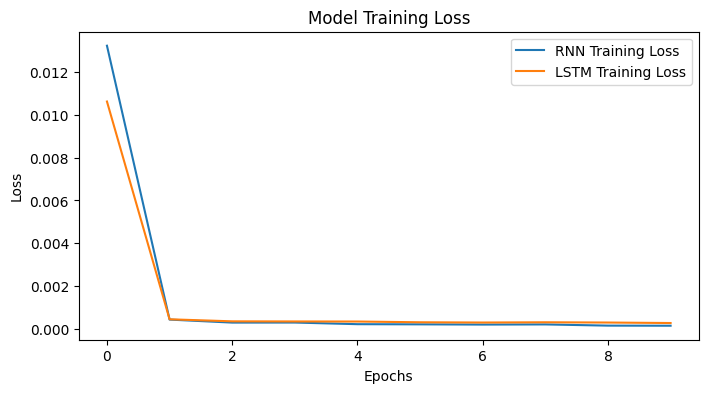

In [40]:
# Plot Training Loss for Both Models
plt.figure(figsize=(8, 4))
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')  # Loss for RNN
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')  # Loss for LSTM
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 5: Make Predictions with Both Models

Predictions using both the RNN and LSTM models involve generating stock price forecasts based on the trained models, using unseen test data as input. By comparing the predicted values to the actual stock prices, the models' abilities to capture sequential patterns and make accurate forecasts are evaluated.

In [42]:
# Generate predictions on training and testing data using RNN
rnn_train_predict = rnn_model.predict(X_train)
rnn_test_predict = rnn_model.predict(X_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [43]:
# Generate predictions on training and testing data using LSTM
lstm_train_predict = lstm_model.predict(X_train)
lstm_test_predict = lstm_model.predict(X_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [44]:
# Inverse Transform Predictions to Original Scale (reverses the normalization applied earlier to scale the stock price data to its original scale)
rnn_train_predict = scaler.inverse_transform(rnn_train_predict)  # Reverse scaling for RNN predictions
rnn_test_predict = scaler.inverse_transform(rnn_test_predict)
lstm_train_predict = scaler.inverse_transform(lstm_train_predict)  # Reverse scaling for LSTM predictions
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)

y_train = scaler.inverse_transform([y_train])  # Reverse scaling for actual training values
y_test = scaler.inverse_transform([y_test])  # Reverse scaling for actual testing values


# Step 6: Visualize Results for Both Models

Visualizing the results of the models allows for better interpretability and to see how accurate each model was.

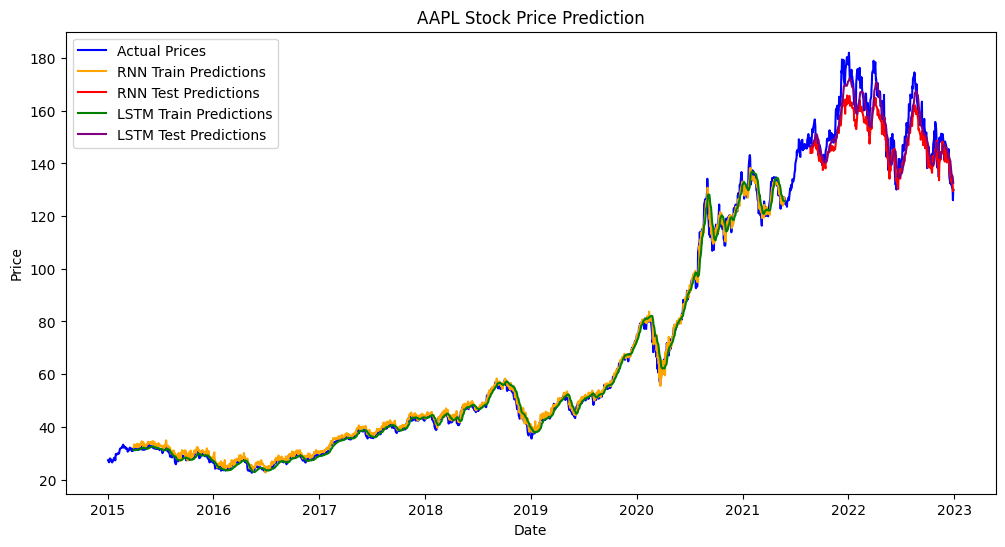

In [49]:
# Plot the historical stock prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Actual Prices', color='blue')  # Actual stock prices

# Define the ranges for plotting RNN predictions
train_range = range(time_step, time_step + len(rnn_train_predict))
test_range = range(len(train_data) + time_step, len(train_data) + time_step + len(rnn_test_predict))

# Plot predictions for RNN
plt.plot(data['Date'].iloc[train_range], rnn_train_predict, label='RNN Train Predictions', color='orange')
plt.plot(data['Date'].iloc[test_range], rnn_test_predict, label='RNN Test Predictions', color='red')

# Plot predictions for LSTM
plt.plot(data['Date'].iloc[train_range], lstm_train_predict, label='LSTM Train Predictions', color='green')
plt.plot(data['Date'].iloc[test_range], lstm_test_predict, label='LSTM Test Predictions', color='purple')

plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 7: Evaluate Both Models

The evaluation of both models involves comparing their predictions against actual stock prices on training and test datasets to assess their accuracy. Metrics like Mean Squared Error (MSE) are calculated to quantify the models' performance, highlighting how well they capture patterns in the data.

In [51]:
# Calculate Mean Squared Error for RNN and LSTM predictions using sklearn library
from sklearn.metrics import mean_squared_error
rnn_train_mse = mean_squared_error(y_train[0], rnn_train_predict[:, 0]) # MSE for RNN Training Data
rnn_test_mse = mean_squared_error(y_test[0], rnn_test_predict[:, 0]) # MSE for RNN Test Data
lstm_train_mse = mean_squared_error(y_train[0], lstm_train_predict[:, 0]) # MSE for LSTM Training Data
lstm_test_mse = mean_squared_error(y_test[0], lstm_test_predict[:, 0]) # MSE for LSTM Test Data

# Print the evaluation results
print(f'RNN Train MSE: {rnn_train_mse}')
print(f'RNN Test MSE: {rnn_test_mse}')
print(f'LSTM Train MSE: {lstm_train_mse}')
print(f'LSTM Test MSE: {lstm_test_mse}')


RNN Train MSE: 3.615111315443737
RNN Test MSE: 60.668330565697616
LSTM Train MSE: 5.817882339927467
LSTM Test MSE: 39.9995642291419


# Step 8: Visualize Evaluation Results

The visualization helps to see how much better one model was over the other.

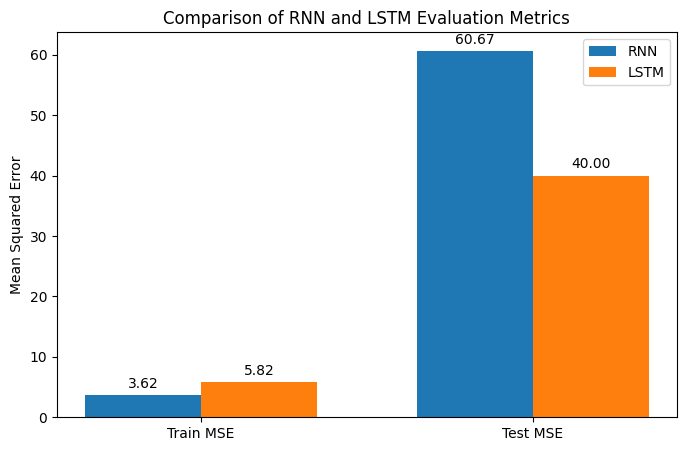

In [52]:
# Bar chart comparing RNN and LSTM performance
labels = ['Train MSE', 'Test MSE']
rnn_mse = [rnn_train_mse, rnn_test_mse]
lstm_mse = [lstm_train_mse, lstm_test_mse]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, rnn_mse, width, label='RNN')
rects2 = ax.bar(x + width/2, lstm_mse, width, label='LSTM')

# Add labels, title, and legend
ax.set_ylabel('Mean Squared Error')
ax.set_title('Comparison of RNN and LSTM Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value annotations on bars
def add_annotations(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text above bar
                    textcoords="offset points",
                    ha='center', va='bottom')

add_annotations(rects1)
add_annotations(rects2)

plt.show()


**Results**

The LSTM model outperforms the RNN model, particularly on the test data. While both models show relatively low Mean Squared Error (MSE) on the training data (3.62 for RNN and 5.82 for LSTM), the LSTM model achieves a significantly lower MSE on the test data (40.00) compared to the RNN model (60.67). This suggests that the LSTM model generalizes better to unseen data and is more effective at capturing longer-term dependencies in the stock price time series.